<a href="https://colab.research.google.com/github/sulaksh26/Handwritten_Digits_Classification_TensorFlow/blob/main/TF7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len (X_test)

10000

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
X_train[0].shape

(28, 28)

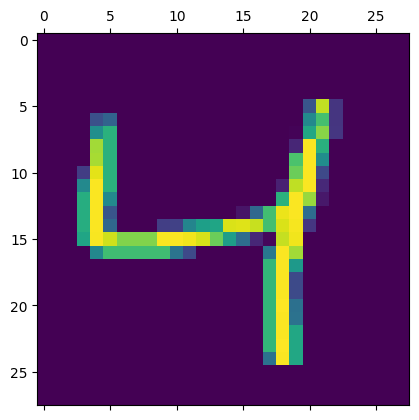

In [ ]:
plt.matshow(X_train[2])

In [ ]:
Y_train[0]

5

In [ ]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
X_train.shape
#60000 is the no of images present in X_train

(60000, 28, 28)

In [ ]:
#Scaling
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [ ]:
X_test_flattened.shape

(10000, 784)

In [ ]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
#Dense forms a connection between input and output neurons i.e. NN
#sigmoid is activation function
#10 is no of nodes in output layer and 784 is no of input nodes
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4666 - accuracy: 0.8783
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2840 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2733 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2672 - accuracy: 0.9258


In [ ]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2676 - accuracy: 0.9257


[0.267598420381546, 0.9257000088691711]

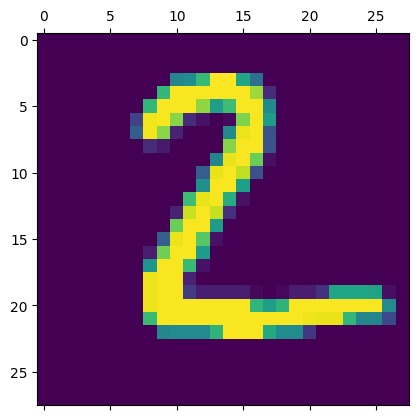

In [ ]:
plt.matshow(X_test[1])

In [ ]:
y_predicted=model.predict(X_test_flattened)
y_predicted[1]
#y_predicted is an array

313/313 [==============================] - 1s 2ms/step


array([4.3357801e-01, 5.0376304e-03, 9.9932873e-01, 3.4974888e-01,
       6.1730382e-10, 8.3126879e-01, 8.6782295e-01, 1.8110555e-12,
       1.4634036e-01, 3.6840808e-09], dtype=float32)

In [ ]:
np.argmax(y_predicted[1])

2

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm
#cm is confusion matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    5,    8,    2,    1,    1],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   5,   10,  917,   18,    8,    5,   11,   11,   44,    3],
       [   3,    0,   19,  919,    0,   28,    2,   12,   20,    7],
       [   1,    2,    5,    2,  915,    0,   10,    4,    8,   35],
       [   9,    2,    3,   26,    8,  790,   12,    7,   28,    7],
       [  10,    3,    8,    1,    7,   14,  911,    2,    2,    0],
       [   1,    5,   21,    8,    4,    1,    0,  955,    2,   31],
       [   7,    7,    7,   23,    9,   30,    9,   11,  863,    8],
       [  10,    7,    1,   10,   27,    8,    0,   25,    7,  914]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

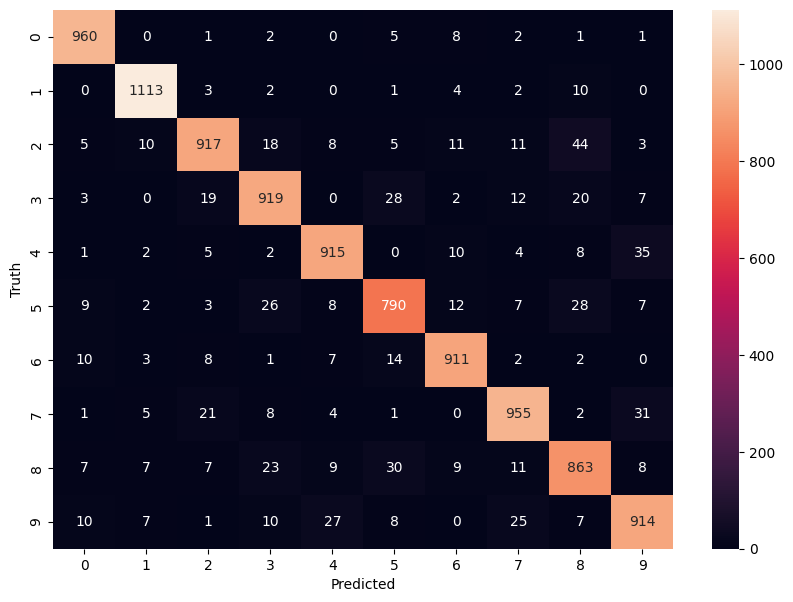

In [ ]:
#Above data in a colorful manner
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#Inserting hidden layers in model which improves performance


model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2742 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1239 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0856 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0651 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0513 - accuracy: 0.9845


In [ ]:
model.evaluate(X_test_flattened,Y_test)
#accuracy improved by adding hidden layer from 92 to 97

313/313 [==============================] - 1s 2ms/step - loss: 0.0818 - accuracy: 0.9756


[0.0818171501159668, 0.975600004196167]

Text(95.72222222222221, 0.5, 'Truth')

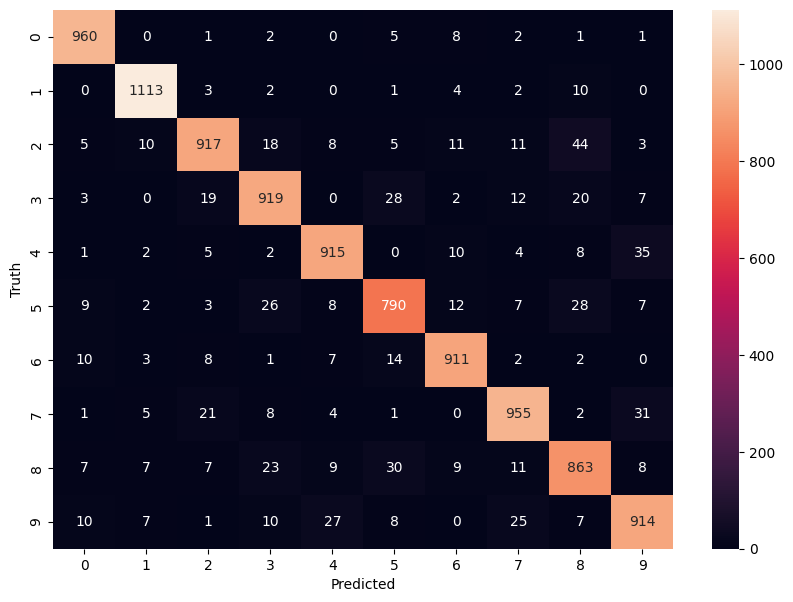

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#In below figure errors are reduced

In [ ]:
#Inserting hidden layers in model which improves performance
#This way we dont have to flatten our layers as they do that on their own, We use Flatten for this purpose and dont flatten layers seperately


model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2773 - accuracy: 0.9196
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1327 - accuracy: 0.9615
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0931 - accuracy: 0.9723
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0709 - accuracy: 0.9787
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0583 - accuracy: 0.9819


In [ ]:
import math

def sigmoid(x):
  return 1/(1+math.exp(-x))

In [ ]:
sigmoid(100)

1.0

In [ ]:
sigmoid(1)

0.7310585786300049

In [ ]:
sigmoid(-56)

4.780892883885469e-25

In [ ]:
sigmoid(0.5)

0.6224593312018546

In [ ]:
def tanh(x):
  return((math.exp(x)-math.exp(-x))/(math.exp(x)+math.exp(-x)))

In [ ]:
tanh(4)

0.9993292997390669

In [ ]:
tanh(56)


1.0

In [ ]:
tanh(-55)

-1.0

In [ ]:
def relu(x):
  return max(0,x)

In [ ]:
relu(-100)

0

In [ ]:
relu(9)

9

In [ ]:
def leaky_relu(x):
  return max(0.1*x,x)

In [ ]:
leaky_relu(2)

2

In [ ]:
leaky_relu(-66)

-6.6000000000000005

In [ ]:
import numpy as np

In [ ]:
revenue=np.array([[180,200,220],[24,36,40],[12,18,20]])
expenses=np.array([[80,90,100],[10,16,20],[8,10,10]])


In [ ]:
profit=revenue-expenses
profit

array([[100, 110, 120],
       [ 14,  20,  20],
       [  4,   8,  10]])

In [ ]:
price_per_unit=np.array([1000,400,1200])
units=np.array([[30,40,50],[4,10,15],[2,5,7]])

In [ ]:
#Matrix Multiplication is called dot product in numpy

np.dot(price_per_unit,units)

array([34000, 50000, 64400])